# tf.keras搭建神经网络八股

- import
- train test
    - 自制数据集
    - 数据增强
- Sequential
- model.compile
- model.fit
    - 断点续训
- model.summary()
    - 参数提取
    - acc/loss可视化

# 神经网络八股功能拓展

1. 自制数据集，解决本领域应用
2. 数据增强，扩充数据集
3. 断点续训，存取模型
4. 参数提取，把参数存入文本
5. acc/loss曲线，观察模型训练情况
6. 应用程序，给图识物

# 自制数据集

### 原始code

In [29]:
# mnist数据集

import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.summary()

Epoch 1/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.2615 - accuracy: 0.9250
Epoch 2/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.1145 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 2s 982us/step - loss: 0.0785 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 2s 960us/step - loss: 0.0585 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 2s 983us/step - loss: 0.0435 - accuracy: 0.9869
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
 

### 生成数据集code

In [30]:
# 根据txt文件中的图片路径以及读取图片并转换为灰度图
# 返回特征x和标签y
def generateds(path, txt):
    
    # 读取txt文件
    f = open(txt ,'r')
    # 读取txt文件中的所有内容
    contents = f.readlines()
    f.close()
    
    # 创建空列表
    # 数组x : 存放特征
    # 数组y : 存放标签
    x, y_ = [] , []
    for content in contents:
        value = content.split()
        # 读取图片路径
        img_path = path + value[0]
        img = Image.open(img_path)
        # 将图片转换为灰度图
        img = np.array(img.convert('L'))
        # 归一化
        img = img / 255.
        x.append(img)
        y_.append(value[1])
        print(f'loading : {content}')
    
    x = np.array(x)
    y_ = np.array(y_)
    y_ = y_.astype(np.int64)
    
    return x, y_

### 自制数据集，并应用

In [35]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os

# 定义训练集和测试集的路径
train_path = './mnist_image_label/mnist_train_jpg_60000/'
train_txt = './mnist_image_label/mnist_train_jpg_60000.txt'

x_train_savepath = "./mnist_image_label/mnist_x_train.npy"
y_train_savepath = "./mnist_image_label/mnist_y_train.npy"

test_path = './mnist_image_label/mnist_test_jpg_10000/'
test_txt = './mnist_image_label/mnist_test_jpg_10000.txt'

x_test_savepath = "./mnist_image_label/mnist_x_test.npy"
y_test_savepath = "./mnist_image_label/mnist_y_test.npy"

In [36]:
if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath) and os.path.exists(x_test_savepath) and os.path.exists(y_test_savepath):
    print('----load data from save file---')
    
    x_train_save = np.load(x_train_savepath)
    x_train = np.reshape(x_train_save,(len(x_train_save),28,28))
    
    x_test_save = np.load(x_test_savepath)
    x_test = np.reshape(x_test_save,(len(x_test_save),28,28))
    
    y_train = np.load(y_train_savepath)
    y_test = np.load(y_test_savepath)
    
else:
    print('---- generate datasets ------')
    x_train, y_train = generateds(train_path,train_txt)
    x_test, y_test = generateds(test_path,test_txt)
    
    print('=== save data to save file ===')
    x_train_save = np.reshape(x_train,(len(x_train),-1))
    x_test_save = np.reshape(x_test,(len(x_test),-1))
    
    np.save(x_train_savepath, x_train_save)
    np.save(y_train_savepath, y_train)
    np.save(x_test_savepath, x_test_save)
    np.save(y_test_savepath, y_test)

---- generate datasets ------
loading : 28755_0.jpg 0

loading : 13360_5.jpg 5

loading : 57662_5.jpg 5

loading : 21455_5.jpg 5

loading : 59351_5.jpg 5

loading : 39461_3.jpg 3

loading : 22720_5.jpg 5

loading : 52282_6.jpg 6

loading : 10872_3.jpg 3

loading : 17077_3.jpg 3

loading : 23650_8.jpg 8

loading : 56239_0.jpg 0

loading : 26079_8.jpg 8

loading : 52645_6.jpg 6

loading : 12727_2.jpg 2

loading : 41052_0.jpg 0

loading : 9148_4.jpg 4

loading : 53908_1.jpg 1

loading : 37061_1.jpg 1

loading : 1645_0.jpg 0

loading : 28683_4.jpg 4

loading : 53318_6.jpg 6

loading : 29761_4.jpg 4

loading : 12201_6.jpg 6

loading : 17042_1.jpg 1

loading : 39117_4.jpg 4

loading : 16573_5.jpg 5

loading : 7726_4.jpg 4

loading : 49029_2.jpg 2

loading : 14651_1.jpg 1

loading : 29343_5.jpg 5

loading : 27726_3.jpg 3

loading : 24053_9.jpg 9

loading : 58584_0.jpg 0

loading : 18713_2.jpg 2

loading : 59958_1.jpg 1

loading : 47646_5.jpg 5

loading : 18536_6.jpg 6

loading : 7352_7.jpg 7


In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test),validation_freq=1)

model.summary()

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2627 - accuracy: 0.9255 - val_loss: 0.1409 - val_accuracy: 0.9566
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1200 - accuracy: 0.9644 - val_loss: 0.1045 - val_accuracy: 0.9688
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0827 - accuracy: 0.9752 - val_loss: 0.0883 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0624 - accuracy: 0.9811 - val_loss: 0.0867 - val_accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0482 - accuracy: 0.9854 - val_loss: 0.0739 - val_accuracy: 0.9774
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 

# 数据增强

数组增强(增大数据量)

image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 所有数据将乘以该数值
      rotation_range = 随机旋转角度数范围
      width_shift_range = 随机宽度偏移量
      height_shift_range = 随机高度偏移量
      水平翻转：horizontal_flip = 是否随机水平翻转
      随机缩放：zoom_range = 随机缩放的范围[1-n，1+n]
      )

在TensorFlow中应用：
```python
# image_gen_train.fit(x_train)

# 例：
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./1., # 如为图像,分母为255时，则图像像素值归一化到[0,1]区间
      rotation_range=45, # 随机旋转45度
      width_shift_range=.15, # 宽度偏移
      height_shift_range=.15, # 高度偏移
      horizontal_flip=False, # 水平翻转
      zoom_range=0.5 # 将图像随机缩放50%
    )
image_gen_train.fit(x_train)
```

### 数据增强应用

In [40]:
import tensorflow as tf 

# 导入MNIST数据集
mnist = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 给训练数据增加一个维度，使数据和网络结构相匹配
x_train = x_train.reshape(x_train.shape[0],28,28,1)
# 定义数据增强器
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./1., # 如为图像，分母为255时，归一化图像像素值在[0,1]之间
    rotation_range=45, # 随机旋转45度
    width_shift_range=.15,# 宽体偏移
    height_shift_range=.15, # 高度偏移
    horizontal_flip=True,# 水平翻转
    zoom_range=0.5 # 将图像随机缩放50%
)

# 构建模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              # 使用sparse_categorical_accuracy 作为评估指标 是因为
              # mnist数据是一个多分类问题，结果只有10个类别，不需要转为one-hot编码
              # sparse_categorical_accuracy 能直接处理整数形式的标签，计算准确率时既高效又简洁，非常适合这个任务场景。
              metrics=['sparse_categorical_accuracy'])

# 训练模型
model.fit(image_gen_train.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test),validation_freq=1)
model.summary()

Epoch 1/5


2024-12-13 14:24:21.216095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1875/1875 [==============================] - 8s 4ms/step - loss: 1.5767 - sparse_categorical_accuracy: 0.4742 - val_loss: 0.7704 - val_sparse_categorical_accuracy: 0.7634
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2028 - sparse_categorical_accuracy: 0.6141 - val_loss: 0.5629 - val_sparse_categorical_accuracy: 0.8329
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 1.0855 - sparse_categorical_accuracy: 0.6540 - val_loss: 0.4946 - val_sparse_categorical_accuracy: 0.8570
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0229 - sparse_categorical_accuracy: 0.6727 - val_loss: 0.4419 - val_sparse_categorical_accuracy: 0.8695
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9817 - sparse_categorical_accuracy: 0.6873 - val_loss: 0.4443 - val_sparse_categorical_accuracy: 0.8631
Model: "sequential_10"
_________________________________________________________________
 Layer (type)   

# 断点续训

### 读取保存模型

**读取模型：**

load_weights(路径文件名)
```python
# 指定模型文件的路径
checkpoint_save_path = './checkpoint/mnist.ckpt'

# 判断是否存在checkpoint_save_path+.index文件 (如果存在，则表示模型文件已经下载完毕)
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)
```


### 保存模型

**保存模型**


```text
tf.keras.callbacks.ModelCheckpoint(
    filepath = 路径文件名,
    save_weights_only = True/False,
    save_best_only = True/False
)

history = model.fit(callbacks=[cp_callback])
```

ModelCheckpoint : 创建一个回调，用于在训练过程中按指定条件保存模型。

1. filepath
- 表示保存文件的路径，可以是简单的文件名，也可以包括格式化选项。
- 例如：
	- filepath="weights.h5"：保存为当前目录下的 weights.h5 文件。
	- filepath="model_{epoch:02d}_{val_loss:.2f}.h5"：使用 {} 占位符动态生成文件名，保存的文件会包含训练轮次（epoch）和验证损失（val_loss）。
2. save_weights_only
	- True：仅保存模型的权重，不包括结构和优化器。
	- False：保存整个模型，包括权重、结构和优化器。
	- 一般来说，保存权重可以节省空间，而保存整个模型适合需要重现训练环境的场景。
3. save_best_only
	- True：仅当模型的性能（如验证损失）优于之前保存的模型时，才保存新的权重。
	- False：每个检查点都保存，不管性能是否提升。
	- 如果设置为 True，需要在 model.fit 中设置 validation_data，因为它依赖验证集的指标。

2. history = model.fit(callbacks=[cp_callback])
模型训练，加入了回调函数列表（callbacks），用来自动在每个训练周期（epoch）结束后保存模型。

**实际用法场景**
1. 防止意外中断的训练：

如果训练因某些原因中断（如断电、重启），通过保存的检查点，可以从中断的地方继续训练。

2. 保存最佳模型：

避免保存不必要的中间模型，只保留验证指标最好的模型，便于后续的测试和部署。

**在TensorFlow中使用**
```python
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
	save_best_only=True,
)

history = model.fit(x_train, y_train, epochs=10, callbacks=[cp_callback],validation_data=(x_test, y_test),valication_freq=1)
```


### 断点续训应用

In [44]:
import tensorflow as tf 
import os

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              # 损失函数使用SparseCategoricalCrossentropy 是因为
              # mnist 任务是一个多分类问题，且标签是整数，不是one-hot编码
              # 真实标签无需进行one-hot编码，直接使用整数表示类别 交叉熵损失适合多分类问题
              # 默认情况下，loss函数会自动softmax，所以这里需要将from_logits设置为False，否则会计算两次softmax
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

### 加入断点续传相关代码

checkpoint_save_path = "./checkpoint/mnist.ckpt"
# 因为 TensorFlow 和 Keras 在保存模型时，会生成一组与模型权重相关的文件，其中 .index 文件是保存 模型检查点元数据 的重要文件
# 因此可通过 .index 文件判断模型是否已经训练过
# 如果存在，则加载模型
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

# 定义断点续训回调函数
# save_best_only=True 表示只保存最佳模型，即loss值最小的那个
# save_weights_only=True 表示只保存模型的权重参数，不保存模型的结构
# filepath 参数表示保存模型的路径
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback])

model.summary()

-------------load the model-----------------
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0184 - sparse_categorical_accuracy: 0.9942 - val_loss: 0.0838 - val_sparse_categorical_accuracy: 0.9769
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0170 - sparse_categorical_accuracy: 0.9949 - val_loss: 0.0782 - val_sparse_categorical_accuracy: 0.9792
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0128 - sparse_categorical_accuracy: 0.9961 - val_loss: 0.0800 - val_sparse_categorical_accuracy: 0.9800
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0119 - sparse_categorical_accuracy: 0.9961 - val_loss: 0.0887 - val_sparse_categorical_accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 2s 950us/step - loss: 0.0099 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0805 - val_sparse_categorical_accuracy: 0.9801
Model: "sequential_14"
_________________________

# 参数提取

**参数提取，把参数存入文本**

model.trainable_variables 返回模型中所有可训练的参数

**设置print 输出格式**

np.set_printoptions(threshold=超过多少省略显示)

```python
np.set_printoptions(threshold=np.inf)
```

```python
# 保存模型参数到txt
file = open('params.txt','w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()
```

In [51]:
# 在断点续传的基础上，获取模型参数

import numpy as np
import tensorflow as tf
import os

np.set_printoptions(threshold=np.inf)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# 断点续训
checkpoint_save_path = "./checkpoint_save_param/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5,batch_size=32, callbacks=[cp_callback],validation_freq=1)

model.summary()
# 获取模型参数
print(f'trainable_variables: {model.trainable_variables}\n')

# 保存参数到txt文件中
file = open('./weights.txt', 'w')
for var in model.trainable_variables:
    file.write(str(var.name) + '\n')
    file.write(str(var.shape) + '\n')
    file.write(str(var.numpy()) + '\n')
file.close()


-------------load the model-----------------
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0228 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.0795 - val_sparse_categorical_accuracy: 0.9769
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0182 - sparse_categorical_accuracy: 0.9943 - val_loss: 0.0860 - val_sparse_categorical_accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0157 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.0810 - val_sparse_categorical_accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0124 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.0858 - val_sparse_categorical_accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 2s 905us/step - loss: 0.0124 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.0948 - val_sparse_categorical_accuracy: 0.9769
Model: "sequential_18"
_________________________

#  acc曲线和loss曲线

```text
history = model.fit(
    训练集数据,
    训练集标签,
    batch_size=,
    epochs=,
    validation_split=用作测试数据的比例,
    validation_data=测试集,
    validation_freq=测试频率
    )
```

**history:**

- loss: 训练集损失
- val_loss: 测试集损失
- sparse_categorical_crossentropy: 训练集准确率
- val_sparse_categorical_crossentropy: 测试集准确率

**TensorFlow获取model的acc数据和loss数据**
```python
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
```

**显示训练集合测试集的acc曲线和loss曲线**
```python
# 绘制训练集和验证集的acc曲线
plt.subplot(1,2,1)
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# 绘制训练集和验证集的loss曲线
plt.subplot(1,2,2)
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
```
    

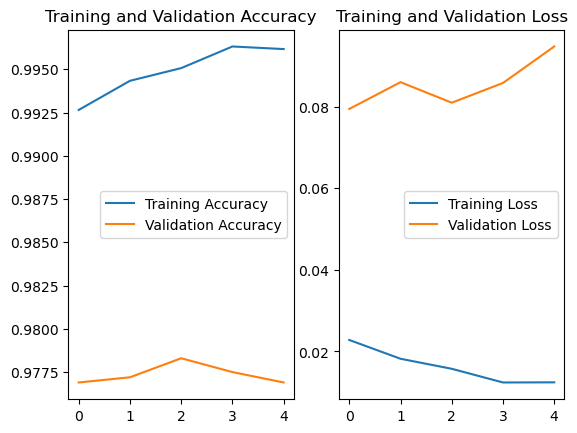

In [52]:
import matplotlib.pyplot as plt

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 绘制训练集和验证集的acc曲线
plt.subplot(1,2,1)
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# 绘制训练集和验证集的loss曲线
plt.subplot(1,2,2)
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()